## Backpropagation für Mehrschichtperzeptrone

### Spielzeugdatensatz

Laden Sie sich das Jupyter-Notebook ”Training eines MLPs auf MNIST” von der Vorlesungs-
seite auf Moodle herunter, das den Numpy-Code für den Backpropagation-Algorithmus für
MLPs enthält. Statt auf MNIST werden wir zunächst ein einfacheres Perzeptron auf den
Spielzeugdaten aus der Vorlesung trainieren.

#### 1.
 Erzeugen Sie 200 zweidimensionale Trainingsdatenpunkte mithilfe einer Gleichvertei-
lung über dem Gebiet [−6, 6]×[−6, 6]. Speichern Sie diese in einer 200×2 Designmatrix.

In [1]:
import numpy as np

random_seed = 42
default_rng = np.random.default_rng(random_seed)

x_train = default_rng.uniform(-6, 6, (200, 2))

### 2.
Die Klassenlabels 0 und 1 werden so vergeben, dass alle Datenpunkte im 1. und 3.
Quadranten das Label 1 und im 2. und 4. Quadranten das Label 0 erhalten. Speichern
Sie die Labels in einem Array.

In [2]:
y_train_mask = ((x_train[:, 0] > 0) & (x_train[:, 1] > 0)) | ((x_train[:, 0] < 0) & (x_train[:, 1] < 0))
y_train = np.zeros(y_train_mask.shape[0])
y_train[y_train_mask] = 1

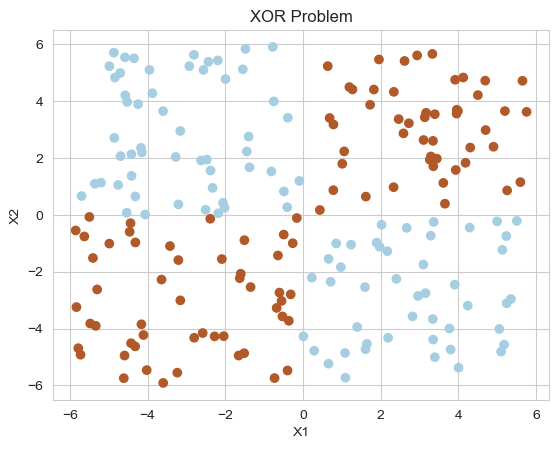

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap = "Paired")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("XOR Problem")
plt.show()

#### 3.
Erzeugen Sie einen gleich großen Testdatensatz nach demselben Prinzip. Stellen Sie
beide Datensätze zur Überprüfung als Scatterplot dar.

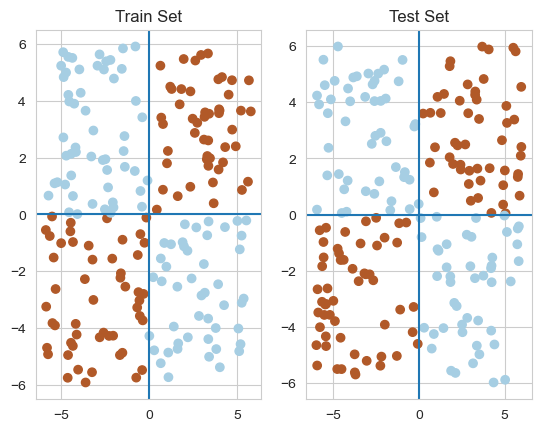

In [4]:
x_test = default_rng.uniform(-6, 6, (200, 2))
y_test_mask = ((x_test[:, 0] > 0) & (x_test[:, 1] > 0)) | ((x_test[:, 0] < 0) & (x_test[:, 1] < 0))
y_test = np.zeros(x_test.shape[0])
y_test[y_test_mask] = 1

fig, axs = plt.subplots(1, 2)

axs[0].scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap = "Paired")
axs[0].axhline(0, -6, 6)
axs[0].axvline(0, -6, 6)
axs[0].set_title("Train Set")
axs[1].scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap = "Paired")
axs[1].axhline(0, -6, 6)
axs[1].axvline(0, -6, 6)
axs[1].set_title("Test Set")
plt.show()


#### 4.
Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten,
sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektor
berechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, das
andere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweilige
Neuron aussehen?

In [5]:
w_ver = np.array([1, 0])
w_hor = np.array([0, 1])


#### 5.
Berechnen Sie die Entscheidungsfunktion beider Neuron mit der im Beispielcode
angegebenen sigmoiden Aktivierungsfunktion auf einem 100 × 100-Gitter innerhalb
des Gebietes [−6, 6] × [−6, 6] und stellen Sie diese zur Überprüfung als Farbbild dar.

In [6]:
x = np.linspace(-6, 6, 100)

x, y = np.meshgrid(x, x)

grid = np.vstack((x.flatten(), y.flatten())).T


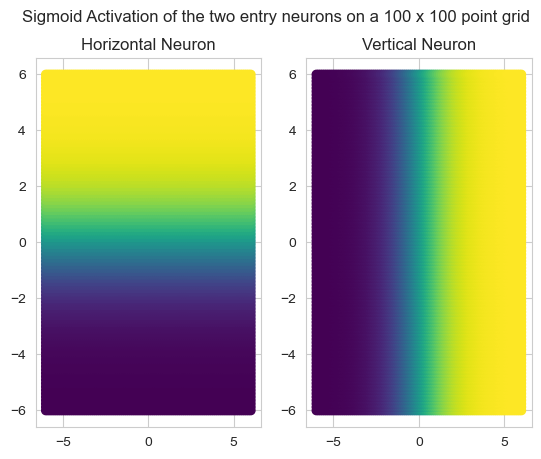

In [7]:
from nn import sigmoid

fig, axs = plt.subplots(1, 2)

fig.suptitle("Sigmoid Activation of the two entry neurons on a 100 x 100 point grid")

axs[0].scatter(grid[:, 0], grid[:, 1], c=sigmoid(grid @ w_hor.T), cmap = "viridis")
axs[0].set_title("Horizontal Neuron")
axs[1].scatter(grid[:, 0], grid[:, 1], c=sigmoid(grid @ w_ver.T), cmap = "viridis")
axs[1].set_title("Vertical Neuron")
plt.show()

#### 6.
Da die Eingangsneuronen nicht mittrainiert werden, können wir deren Output schon
im Vorfeld berechnen. Erzeugen Sie dazu neue Designmatritzen für den Trainings-
und Testdatensatz, so dass die erste Spalte den Output des ersten Neurons und die
zweite Spalte den Output des zweiten Neurons enthält. Erzeugen Sie auch eine entspre-
chende Designmatrix für Ihr 100 × 100-Gitter, das wir später zu Darstellungszwecken
brauchen werden. Wichtig: arbeiten Sie im Folgenden nur mit diesen transformierten
Designmatritzen, um korrekte Ergebnisse zu erhalten!

In [8]:
train_design = np.vstack(((sigmoid(x_train @ w_ver.T)), sigmoid(x_train @ w_hor.T))).T
test_design = np.vstack(((sigmoid(x_test @ w_ver.T)), sigmoid(x_test @ w_hor.T))).T
grid_design = np.vstack(((sigmoid(grid @ w_ver.T)), sigmoid(grid @ w_hor.T))).T

### 2. Trainings eines MLP auf den Spieldatensatz

#### 1.
Setzen Sie im Code die Größe der Minibatches auf 10, die Anzahl der Epochen
auf 150 und die Lernrate auf 0.03. Ändern Sie die Netzarchitektur so ab, dass sie 2
Eingangsneuronen, 2 verdeckte Schichten mit jeweils 2 Neuronen und 1 Ausgangsneuron
haben. Überprüfen Sie die Größen der sich daraus ergebenden Gewichtsmatritzen auf
Korrektheit.

In [9]:
from nn import FCNN

configs = {
    "eta": 0.03,
    "mbs": 10,
    "no_hidden": 2,
    "activation": "sigmoid",
    "cost_function": "mse"
}

model = FCNN(**configs)

In [10]:
model.weights[0]

array([[-1.32337363,  0.47246559],
       [ 2.10496953, -0.26634187]])

#### 2.
Der Beispielcode verwendet One-Hot-Coding für die Labels, in unserem Beispiel sind
die Klassenzugehörigkeiten aber durch die Klassenindizes 0 und 1 codiert. Wir müssen
daher die Funktion evaluate() im Code so abändern, dass ein Beispiel als korrekt
klassifiziert gilt, wenn bei Klasse 0 der MLP-Output kleiner als 0.5 ist und bei Klasse 1
größer als 0.5. Berechnen Sie zusätzlich den MSE in dieser Funktion bei jedem Aufruf
uns speichern Sie diesen in einem zusätzlichen Array ab.

#### 3.
Trainieren Sie Ihr Netz mit den Trainingsdaten als Validierungsdaten und testen Sie es
auf Ihren Testdaten. Stellen Sie die Lernkurven für Genauigkeit und MSE als Plots dar.
Beachten Sie hierbei, dass unser Lernproblem nicht konvex ist, so dass die Optimierung
zuweilen in lokalen Minima hängenbleiben kann. Wiederholen Sie Ihren Versuch daher
mehrere Male und vergeleichen Sie die Ergebnisse.

In [11]:
acc, loss = [], []

for i in range(5):
    model = FCNN(**configs)
    model(train_design, y_train, test_design, y_test, 100)
    acc.append(model.validation_accuracy)
    loss.append(model.validation_loss)


Epoch 0: 95.0 / 200 --- mse: 0.12835652064577063
Epoch 1: 95.0 / 200 --- mse: 0.12788522781538647
Epoch 2: 95.0 / 200 --- mse: 0.12747661995500548
Epoch 3: 95.0 / 200 --- mse: 0.1271361399868165
Epoch 4: 95.0 / 200 --- mse: 0.12683944965004365
Epoch 5: 95.0 / 200 --- mse: 0.12659798314981335
Epoch 6: 95.0 / 200 --- mse: 0.12638693259797207
Epoch 7: 95.0 / 200 --- mse: 0.12621539078220276
Epoch 8: 95.0 / 200 --- mse: 0.1260560565642864
Epoch 9: 95.0 / 200 --- mse: 0.12592355715620876
Epoch 10: 95.0 / 200 --- mse: 0.1258112220823611
Epoch 11: 95.0 / 200 --- mse: 0.12570269898324157
Epoch 12: 95.0 / 200 --- mse: 0.12561072478334914
Epoch 13: 95.0 / 200 --- mse: 0.12552894591136768
Epoch 14: 95.0 / 200 --- mse: 0.12546099660380766
Epoch 15: 95.0 / 200 --- mse: 0.12540906954961162
Epoch 16: 95.0 / 200 --- mse: 0.1253678402930951
Epoch 17: 95.0 / 200 --- mse: 0.12532569944750885
Epoch 18: 95.0 / 200 --- mse: 0.12528990555304553
Epoch 19: 95.0 / 200 --- mse: 0.12525912554516055
Epoch 20: 95.0

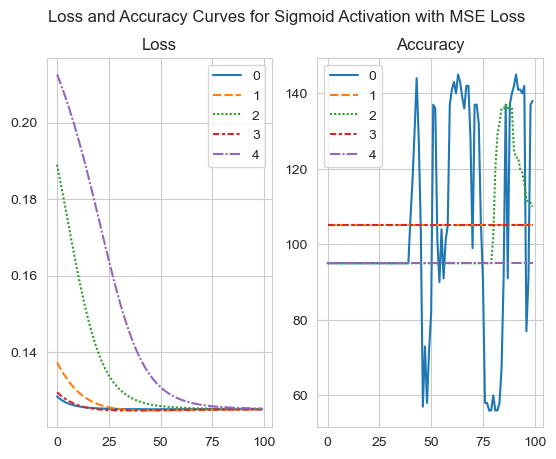

In [12]:
import seaborn as sns

fig, axs = plt.subplots(1, 2)

sns.lineplot(loss, ax=axs[0])
axs[0].set_title("Loss")

sns.lineplot(acc, ax=axs[1])
axs[1].set_title("Accuracy")

fig.suptitle("Loss and Accuracy Curves for Sigmoid Activation with MSE Loss")
plt.show()

[TF Playground mit ähnlich schlechter Performanz bei gleichen Hyperparametern](http://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.79381&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

#### 4.
Berechnen Sie die Entscheidungsfunktion Ihres MLPs für Ihr 100 × 100-Gitter und
stellen Sie diese gemeinsam mit dem Scatterplot Ihrer Trainingsdaten dar.

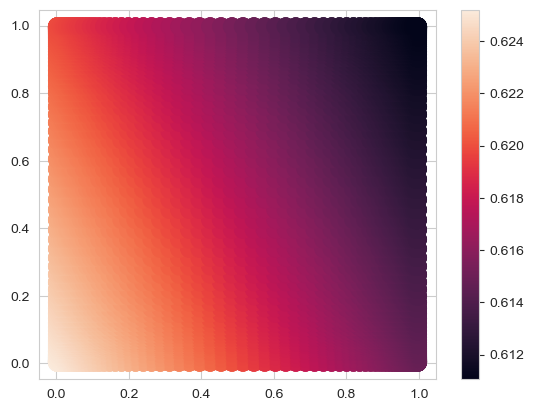

In [13]:
layer_0 = sigmoid(grid_design @ model.weights[0].T)
layer_1 = sigmoid(layer_0 @ model.weights[1].T)
layer_2 = sigmoid(layer_0 @ model.weights[2].T)
decision_function = sigmoid(layer_2 @ model.weights[3].T)


fig = plt.scatter(grid_design[:, 0], grid_design[:, 1], c=decision_function, s=150)
plt.colorbar(fig)
plt.show()

In [14]:
np.min(decision_function)

0.6110547747221988

### 3. Nachvollziehen der Beispiele aus der Vorlesung
Das Netz aus der Vorlesung verwendet als Aktivierungsfunktion den Tangens hyperbolicus
(np.tanh()). Passen Sie die Funktionen sigmoid() und sigmoid_prime() entsprechend
an. Achtung: kommentieren Sie den bisherigen Code für die Sigmoidfunktion nur aus, wir
werden ihn in der nächsten Aufgabe nochmals benötigen. Da die Ausgangswerte von tanh
im Intervall [−1, 1] statt [0, 1] liegen, müssen wir hierfür nochmals die Funktion evaluate()
entsprechend anpassen. Vollziehen Sie die 3 Beispiele aus der Vorlesung nach.

In [15]:
configs = {
    "eta": 0.03,
    "mbs": 10,
    "no_hidden": 2,
    "activation": "tanh",
    "cost_function": "mse"
}

In [16]:
acc, loss = [], []

for i in range(5):
    model = FCNN(**configs)
    model(train_design, y_train, test_design, y_test, 100)
    acc.append(model.validation_accuracy)
    loss.append(model.validation_loss)


Epoch 0: 95.0 / 200 --- mse: 0.12587302142112444
Epoch 1: 95.0 / 200 --- mse: 0.12578675524954178
Epoch 2: 95.0 / 200 --- mse: 0.12569984061511996
Epoch 3: 95.0 / 200 --- mse: 0.12562945396941283
Epoch 4: 95.0 / 200 --- mse: 0.12556018279012723
Epoch 5: 95.0 / 200 --- mse: 0.12550404159943154
Epoch 6: 95.0 / 200 --- mse: 0.12545380307447812
Epoch 7: 95.0 / 200 --- mse: 0.12541274809066408
Epoch 8: 95.0 / 200 --- mse: 0.12536708327154414
Epoch 9: 95.0 / 200 --- mse: 0.1253291112908712
Epoch 10: 95.0 / 200 --- mse: 0.12529686172043403
Epoch 11: 95.0 / 200 --- mse: 0.12527183751141935
Epoch 12: 95.0 / 200 --- mse: 0.12524882353285124
Epoch 13: 95.0 / 200 --- mse: 0.1252232927993221
Epoch 14: 95.0 / 200 --- mse: 0.1252036797391829
Epoch 15: 95.0 / 200 --- mse: 0.12518465248019445
Epoch 16: 95.0 / 200 --- mse: 0.12516947638214146
Epoch 17: 95.0 / 200 --- mse: 0.12515290439577378
Epoch 18: 95.0 / 200 --- mse: 0.12513638559320928
Epoch 19: 95.0 / 200 --- mse: 0.12512163775850424
Epoch 20: 95.

Text(0.5, 1.0, 'Accuracy')

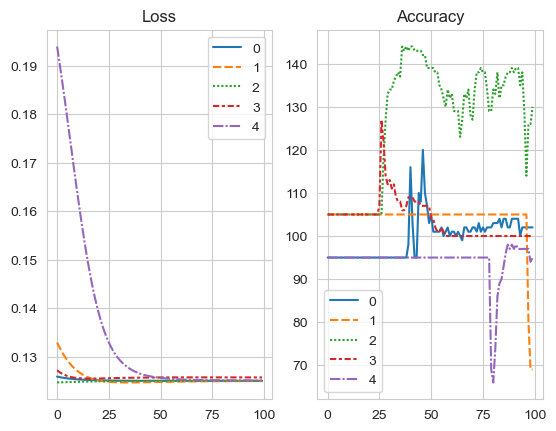

In [17]:
fig, axs = plt.subplots(1, 2)

sns.lineplot(loss, ax=axs[0])
axs[0].set_title("Loss")

sns.lineplot(acc, ax=axs[1])
axs[1].set_title("Accuracy")

### 4. Logistische Regression
Eine alternative, besser an das Klassifikationsszenario angepasste Kostenfunktion statt des
MSE ist die Kostenfunktion für die logistische Regression:
$ C = -ylog(a^{L}) - (1- y)log(1-a^{L}).$
Damit Sie diese in Ihrem Beispiel anwenden können, müssen Sie die Ableitung ∇aLC
berechnen und die Funktion cost_derivative() entsprechend abändern. Da die logistische
Regression davon ausgeht, dass der Output des Netzes eine Wahrscheinlichkeit zwischen 0
und 1 ist, können wir hierfür nicht den tanh() als Aktivierungsfunktion verwenden. Machen
Sie daher Ihre Änderungen aus Aufgabe 3 rückgängig, so dass Sie wieder eine sigmoide
Aktivierungsfunktion haben. In der Funktion evaluate() sollte natürlich statt des MSE
die Kostenfunktion der logistischen Regression ausgegeben werden, um zu überprüfen, ob
tatsächlich ein Gradientenabstieg stattfindet. Weiterhin ist es nützlich, sowohl auf C wie auf
∇aLC die Funktion np.nan_to_num() anzuwenden, da hier zuweilen numerische Probleme
auftreten können. Auch die Lernrate muss angepasst werden: η = 1.0 funktioniert hier
deutlich besser.

In [18]:
configs = {
    "eta": 1,
    "mbs": 10,
    "no_hidden": 2,
    "activation": "sigmoid",
    "cost_function": "logistic_loss"
}

In [19]:
acc, loss = [], []

for i in range(5):
    model = FCNN(**configs)
    model(train_design, y_train, test_design, y_test, 100)
    acc.append(model.validation_accuracy)
    loss.append(model.validation_loss)


Epoch 0: 105.0 / 200 --- logistic_loss: 138.8160705660176
Epoch 1: 105.0 / 200 --- logistic_loss: 138.39690777017253
Epoch 2: 105.0 / 200 --- logistic_loss: 138.3531971357003
Epoch 3: 105.0 / 200 --- logistic_loss: 138.3642573666171
Epoch 4: 105.0 / 200 --- logistic_loss: 138.38185925395567
Epoch 5: 105.0 / 200 --- logistic_loss: 138.40274528182158
Epoch 6: 105.0 / 200 --- logistic_loss: 138.42196898086198
Epoch 7: 105.0 / 200 --- logistic_loss: 138.44151797182008
Epoch 8: 105.0 / 200 --- logistic_loss: 138.4508076544494
Epoch 9: 105.0 / 200 --- logistic_loss: 138.4594381384999
Epoch 10: 105.0 / 200 --- logistic_loss: 138.4677648607461
Epoch 11: 105.0 / 200 --- logistic_loss: 138.4763015801875
Epoch 12: 105.0 / 200 --- logistic_loss: 138.48271264689112
Epoch 13: 105.0 / 200 --- logistic_loss: 138.48816401739964
Epoch 14: 105.0 / 200 --- logistic_loss: 138.49215606229785
Epoch 15: 105.0 / 200 --- logistic_loss: 138.4945988028436
Epoch 16: 105.0 / 200 --- logistic_loss: 138.4961613767107

Text(0.5, 1.0, 'Accuracy')

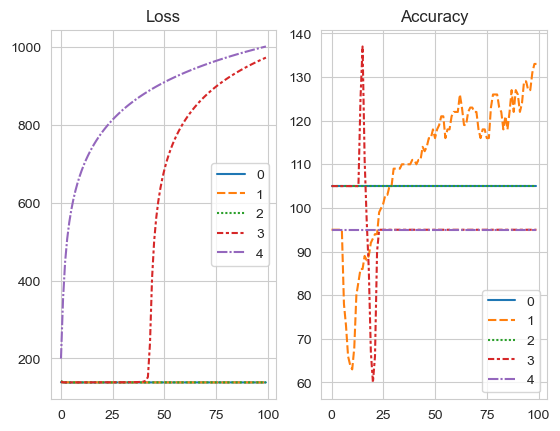

In [20]:
fig, axs = plt.subplots(1, 2)

sns.lineplot(loss, ax=axs[0])
axs[0].set_title("Loss")

sns.lineplot(acc, ax=axs[1])
axs[1].set_title("Accuracy")